In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

def load_and_preprocess_data(file_path, target_column):
    df = pd.read_csv(file_path)
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test, preprocessor

def train_and_evaluate(X_train, X_test, y_train, y_test, preprocessor, regressor, param_grid):
    model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', regressor)])
    
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Best Parameters: {grid_search.best_params_}")
    print("MSE:", mse, "R2:", r2)

    return y_pred, y_test

def categorize_scores(scores):
    categories = []
    for score in scores:
        if score < 50:
            categories.append('Fail')
        elif 50 <= score < 60:
            categories.append('Second Class')
        elif 60 <= score < 75:
            categories.append('First Class')
        else:
            categories.append('First Class with Distinction')
    return categories

def save_results_to_csv(y_test, final_predictions, categories, algo_name):
    results_df = pd.DataFrame({
        'Actual Score': list(y_test),
        'Predicted Score': final_predictions,
        'Category': categories
    })

    results_df.to_csv(f'model_predictions_{algo_name.replace(" ", "_").lower()}.csv', index=False)
    print(f"Results have been exported to 'model_predictions_{algo_name.replace(' ', '_').lower()}.csv'.")

# Additional algorithms to try
algorithms = [
    ('Gradient Boosting', GradientBoostingRegressor(), {'regressor__n_estimators': [40, 50, 100, 150]}),
    ('Random Forest', RandomForestRegressor(), {'regressor__n_estimators': [40 ,50, 100, 150], 'regressor__max_depth': [None, 10, 20]}),
    ('SVR', SVR(), {'regressor__C': [0.1, 1, 10], 'regressor__kernel': ['linear', 'rbf']})
]


In [2]:
personal_factors_path = '../data/persoanl factor.csv'
home_factors_path = '../data/home.csv'
school_factors_path = '../data/school.csv'

In [3]:
p_f = pd.read_csv(personal_factors_path)
h_f = pd.read_csv(home_factors_path)
s_f = pd.read_csv(school_factors_path)

In [4]:
p_f.shape , h_f.shape , s_f.shape

((3034, 13), (3034, 16), (3034, 14))

In [5]:
# Concatenate DataFrames column-wise
result = pd.concat([p_f, h_f, s_f], axis=1)

result.shape

(3034, 43)

In [6]:
result.head()

,Score,Age,Gender,Family type,"Literacy in family (here, educated means they have obtained basic education atleast)",Family income,Fathers' occupation,Residential area /place of living,Type of school,Transportation to the school,...,9. Do you feel performance pressure in examination?,14. Do you feel fear to examination?,17. Do your teachers get personal involvement in your development?,1. Are you satisfied with the infrastructure of the school?,3. Are you satisfied with Teacher's contribution in your educational performance,5. Are you satisfied with Transportation facility provided by school,9. Do you satisfied with Teacher-students relationship?,10. Are you satisfied with School located in Rural area,11. Are you satisfied with School located in urban area?,14. Are you satisfied with the environment at school for your educational performance?
0,91,17,Male,Joint family,both the parents are well educated,"20,001 to 40,000",private job,urban area,private school,by peronal vehicle,...,No,No,No,Satisfied,highly satisfied,highly dis - satisfied,Neutral,highly satisfied,highly satisfied,highly satisfied
1,90,17,Male,Joint family,both the parents are well educated,"40,001 to 60,000",govt job,urban area,grant in aid school,by school bus,...,No,No,No,highly satisfied,highly satisfied,highly dis - satisfied,highly satisfied,highly satisfied,highly satisfied,highly satisfied
2,80,17,Male,Joint family,both the parents are well educated,"upto 20,000",private job,urban area,private school,by peronal vehicle,...,No,No,No,Satisfied,highly satisfied,highly dis - satisfied,highly satisfied,highly satisfied,highly satisfied,highly satisfied
3,80,17,Male,Joint family,both the parents are well educated,"20,001 to 40,000",self-employee,urban area,grant in aid school,by peronal vehicle,...,No,No,No,Satisfied,highly satisfied,highly dis - satisfied,highly satisfied,highly satisfied,highly satisfied,highly satisfied
4,80,17,Male,Joint family,both the parents are well educated,"20,001 to 40,000",private job,urban area,grant in aid school,by peronal vehicle,...,No,No,No,Satisfied,highly satisfied,highly dis - satisfied,highly satisfied,highly satisfied,highly satisfied,highly satisfied


In [7]:
result.to_csv("all.csv" ,index=False)

In [8]:
for i in list(result.columns):
    print(i)

Score
Age
Gender
Family type
Literacy in family (here, educated means they have obtained basic education atleast)
Family income
Fathers' occupation
Residential area /place of living
Type of school
Transportation to the school
1. Are you attending school regularly?
2. Do you bunk class regularly?
3. Are you feel fear to go to school?
Score
8. Do you have good relationship with your parents?
10. Do you suffer from unhealthy lifestyle?
11. Do you get distracted by gadgets and mobile phones?
12. Do you interested to do your educational work at home?
13. Do you go to tuition class or personal classes?
16. Do you worried about financial condition of your family?
18. Do your parents get personal involvement in your development?
2. Are you satisfied with your residency facility?
4. Are you satisfied with Parent's contribution in your educational performance
6. Arer you satisfied with Personal transportation to school?
7. what do you feel by society pressure in educational performance?
8. What 

In [9]:
questions_list = [
    "Score",
    "Family type",
    "Literacy in family (here, educated means they have obtained basic education atleast)",
    "Family income",
    "Fathers' occupation",
    "Residential area /place of living",
    "Type of school",
    "Transportation to the school",
    "1. Are you attending school regularly?",
    "3. Are you feel fear to go to school?",
    "6. which activity of the school you enjoy the most?",
    "10. Do you suffer from unhealthy lifestyle?",
    "11. Do you get distracted by gadgets and mobile phones?",
    "12. Do you interested to do your educational work at home?",
    "13. Do you go to tuition class or personal classes?",
    "14. Do you feel fear to examination?",
    "16. Do you worried about financial condition of your family?",
    "1. Are you satisfied with the infrastructure of the school?",
    "2. Are you satisfied with your residency facility?",
    "7. what do you feel by society pressure in educational performance?",
    "8. What do you feel by family pressure in educational performance?",
    "11. Are you satisfied with School located in urban area?",
    "10. Are you satisfied with School located in Rural area"
]

In [10]:
# Create a DataFrame with only the columns from questions_list
selected_columns_df = result[questions_list]
selected_columns_df.shape

selected_columns_df.to_csv("final.csv" , index=False)

In [12]:
final_df_path = "../data/final.csv"

for algo_name, regressor, param_grid in algorithms:
    print(f"\nTraining and evaluating using {algo_name}...")
    
    X_train_pf, X_test_pf, y_train_pf, y_test_pf, preprocessor_pf = load_and_preprocess_data(final_df_path, 'Score')
   
    predictions_pf, y_test_pf = train_and_evaluate(X_train_pf, X_test_pf, y_train_pf, y_test_pf, preprocessor_pf, regressor, param_grid)
   
    final_predictions = np.maximum.reduce([predictions_pf])
    categories = categorize_scores(final_predictions)

    save_results_to_csv(y_test_pf, final_predictions, categories, algo_name)


Training and evaluating using Gradient Boosting...


KeyboardInterrupt: 

## Add some more colums

In [ ]:
p_f = pd.read_csv(personal_factors_path)
h_f = pd.read_csv(home_factors_path)
s_f = pd.read_csv(school_factors_path)

In [6]:
p_f_c = list(p_f.columns)
h_f_c = list(h_f.columns)
s_f_c = list(s_f.columns)

In [76]:
h_f_c

['Score',
 '8. Do you have good relationship with your parents?',
 '10. Do you suffer from unhealthy lifestyle?',
 '11. Do you get distracted by gadgets and mobile phones?',
 '12. Do you interested to do your educational work at home?',
 '13. Do you go to tuition class or personal classes?',
 '16. Do you worried about financial condition of your family?',
 '18. Do your parents get personal involvement in your development?',
 '2. Are you satisfied with your residency facility?',
 "4. Are you satisfied with Parent's contribution in your educational performance",
 '6. Arer you satisfied with Personal transportation to school?',
 '7. what do you feel by society pressure in educational performance?',
 '8. What do you feel by family pressure in educational performance?',
 '12. Are you satisfied with residency in urban area for your educational performance?',
 '13. Are you satisfied with residency in rural area for your educational performance',
 '15. Are you satisfied with the atmosphere at 

In [77]:
questions_list = [
    "Score",
    "Family type",
    "Literacy in family (here, educated means they have obtained basic education atleast)",
    # "Family income",
    # "Fathers' occupation",
    "Residential area /place of living",
    # "Type of school",
    # "Transportation to the school",
    "1. Are you attending school regularly?",
    "7. Do you have good teacher-students relationship??",
    "3. Are you feel fear to go to school?",
    "6. which activity of the school you enjoy the most?",
    "10. Are you satisfied with School located in Rural area",
    "1. Are you satisfied with the infrastructure of the school?",
    "11. Are you satisfied with School located in urban area?",
    # "12. Do you interested to do your educational work at home?",
    # "13. Do you go to tuition class or personal classes?",
    "14. Do you feel fear to examination?",
    # "16. Do you worried about financial condition of your family?",
    "18. Do your parents get personal involvement in your development?",
    "1. Are you satisfied with the infrastructure of the school?",
    "2. Are you satisfied with your residency facility?",
    "7. what do you feel by society pressure in educational performance?",
    "8. What do you feel by family pressure in educational performance?",
    # "11. Are you satisfied with School located in urban area?",
    "6. Arer you satisfied with Personal transportation to school?",
    # "10. Are you satisfied with School located in Rural area",
    "15. Are you satisfied with the atmosphere at home for your educational performance?"
]

In [78]:
s = sorted([1 , 2,3,6,10,11,12,12,14,16,7,8,11,10,2,8,9,10,7,5])
s

[1, 2, 2, 3, 5, 6, 7, 7, 8, 8, 9, 10, 10, 10, 11, 11, 12, 12, 14, 16]

In [79]:
# Create a DataFrame with only the columns from questions_list
selected_columns_df = result[questions_list]
selected_columns_df.shape


(3034, 21)

In [80]:
s = p_f['Score']

In [81]:
selected_columns_df = selected_columns_df.drop(['Score'], axis=1)
selected_columns_df.shape

(3034, 18)

In [82]:
result_1 = pd.concat([selected_columns_df, s], axis=1)
result_1.shape


(3034, 19)

In [83]:
result_1.to_csv("add_cl_data.csv" , index=False)

In [84]:
final_df_path = "add_cl_data.csv"

for algo_name, regressor, param_grid in algorithms:
    print(f"\nTraining and evaluating using {algo_name}...")
    
    X_train_pf, X_test_pf, y_train_pf, y_test_pf, preprocessor_pf = load_and_preprocess_data(final_df_path, 'Score')
   
    predictions_pf, y_test_pf = train_and_evaluate(X_train_pf, X_test_pf, y_train_pf, y_test_pf, preprocessor_pf, regressor, param_grid)
   
    final_predictions = np.maximum.reduce([predictions_pf])
    categories = categorize_scores(final_predictions)

    save_results_to_csv(y_test_pf, final_predictions, categories, algo_name)


Training and evaluating using Gradient Boosting...
Best Parameters: {'regressor__n_estimators': 150}
MSE: 25.048535285360852 R2: 0.7354311596890686
Results have been exported to 'model_predictions_gradient_boosting.csv'.

Training and evaluating using Random Forest...
Best Parameters: {'regressor__max_depth': 10, 'regressor__n_estimators': 100}
MSE: 24.762288509609682 R2: 0.7384545691076421
Results have been exported to 'model_predictions_random_forest.csv'.

Training and evaluating using SVR...
Best Parameters: {'regressor__C': 10, 'regressor__kernel': 'rbf'}
MSE: 25.485281566293356 R2: 0.7308181371813631
Results have been exported to 'model_predictions_svr.csv'.


In [69]:
m_g = pd.read_csv("../save_results/model_predictions_gradient_boosting.csv")
m_d = pd.read_csv("../save_results/model_predictions_decision_tree.csv")
m_r = pd.read_csv("../save_results/model_predictions_random_forest.csv")
m_s = pd.read_csv("../save_results/model_predictions_svr.csv")
m_e = pd.read_csv("../save_results/model_predictions_elastic_net.csv")
m_k = pd.read_csv("../save_results/model_predictions_k-nearest_neighbors.csv")
m_la = pd.read_csv("../save_results/model_predictions_lasso.csv")
m_li = pd.read_csv("../save_results/model_predictions_linear_regression.csv")
m_r =pd.read_csv("../save_results/model_predictions_random_forest.csv")
m_ri = pd.read_csv("../save_results/model_predictions_ridge.csv")

In [59]:
m_g.head()

,Actual Score,Predicted Score,Category
0,76,78.321034,First Class with Distinction
1,78,84.051083,First Class with Distinction
2,81,82.678420,First Class with Distinction
3,81,83.010518,First Class with Distinction
4,81,82.775020,First Class with Distinction


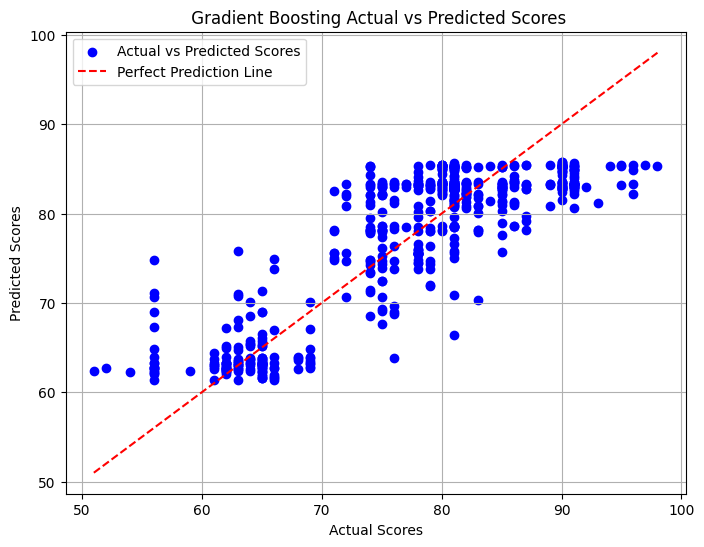

In [65]:
import matplotlib.pyplot as plt

# Actual and Predicted Scores
actual_scores = m_g["Actual Score"]
predicted_scores = m_g["Predicted Score"]

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(actual_scores, predicted_scores, color='blue', label='Actual vs Predicted Scores')
plt.plot([min(actual_scores), max(actual_scores)], [min(actual_scores), max(actual_scores)], linestyle='--', color='red', label='Perfect Prediction Line')
plt.title(' Gradient Boosting Actual vs Predicted Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.legend()
plt.grid(True)
plt.show()


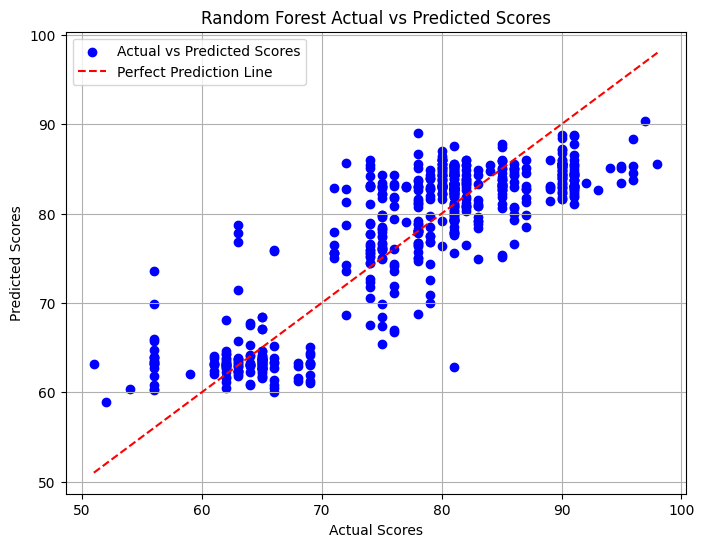

In [66]:
# Actual and Predicted Scores
actual_scores = m_r["Actual Score"]
predicted_scores = m_r["Predicted Score"]

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(actual_scores, predicted_scores, color='blue', label='Actual vs Predicted Scores')
plt.plot([min(actual_scores), max(actual_scores)], [min(actual_scores), max(actual_scores)], linestyle='--', color='red', label='Perfect Prediction Line')
plt.title('Random Forest Actual vs Predicted Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.legend()
plt.grid(True)
plt.show()


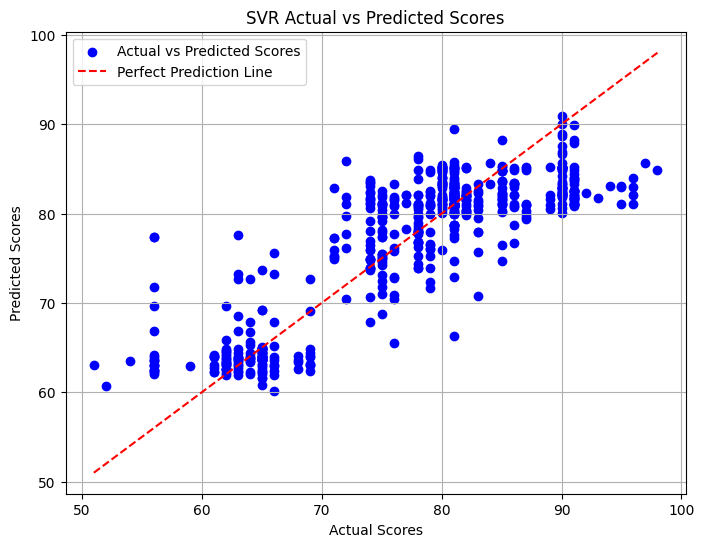

In [67]:
# Actual and Predicted Scores
actual_scores = m_s["Actual Score"]
predicted_scores = m_s["Predicted Score"]

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(actual_scores, predicted_scores, color='blue', label='Actual vs Predicted Scores')
plt.plot([min(actual_scores), max(actual_scores)], [min(actual_scores), max(actual_scores)], linestyle='--', color='red', label='Perfect Prediction Line')
plt.title('SVR Actual vs Predicted Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.legend()
plt.grid(True)
plt.show()


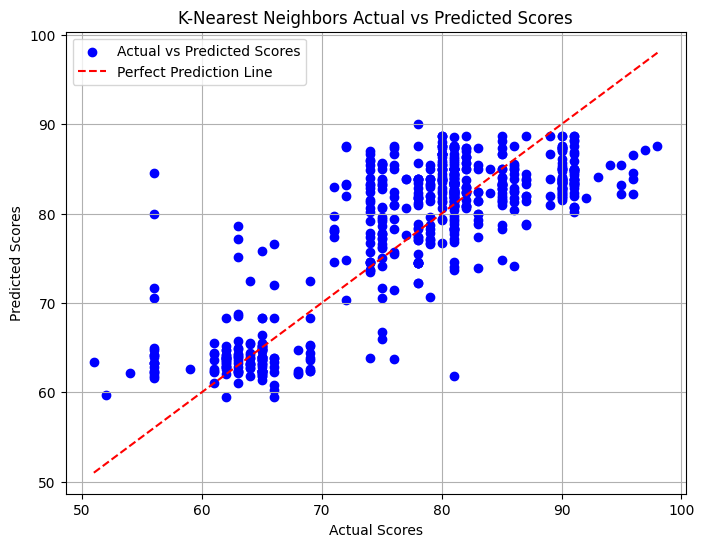

In [68]:
# Actual and Predicted Scores
actual_scores = m_k["Actual Score"]
predicted_scores = m_k["Predicted Score"]

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(actual_scores, predicted_scores, color='blue', label='Actual vs Predicted Scores')
plt.plot([min(actual_scores), max(actual_scores)], [min(actual_scores), max(actual_scores)], linestyle='--', color='red', label='Perfect Prediction Line')
plt.title('K-Nearest Neighbors Actual vs Predicted Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.legend()
plt.grid(True)
plt.show()


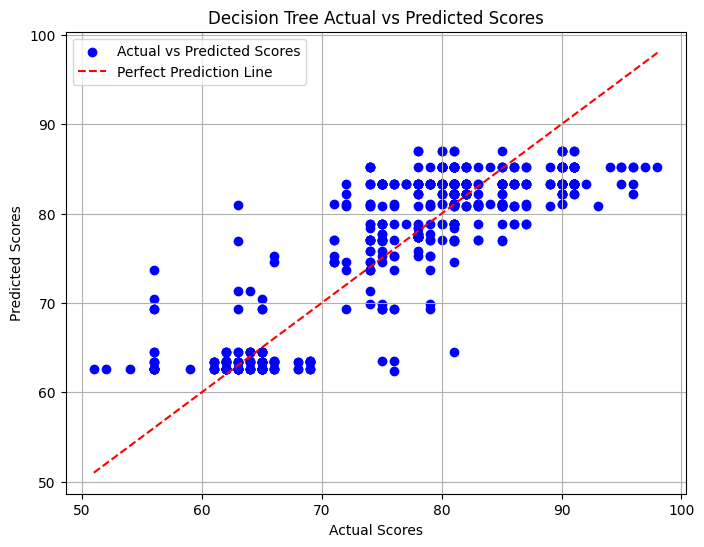

In [70]:
# Actual and Predicted Scores
actual_scores = m_d["Actual Score"]
predicted_scores = m_d["Predicted Score"]

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(actual_scores, predicted_scores, color='blue', label='Actual vs Predicted Scores')
plt.plot([min(actual_scores), max(actual_scores)], [min(actual_scores), max(actual_scores)], linestyle='--', color='red', label='Perfect Prediction Line')
plt.title('Decision Tree Actual vs Predicted Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.legend()
plt.grid(True)
plt.show()


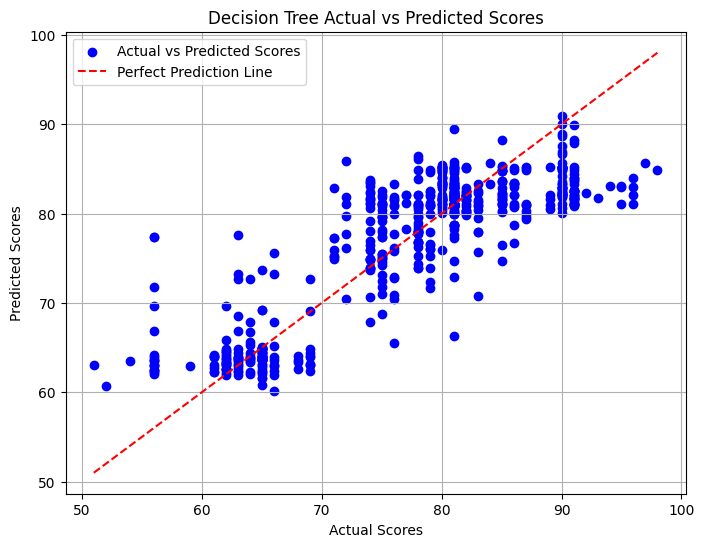

In [71]:
# Actual and Predicted Scores
actual_scores = m_s["Actual Score"]
predicted_scores = m_s["Predicted Score"]

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(actual_scores, predicted_scores, color='blue', label='Actual vs Predicted Scores')
plt.plot([min(actual_scores), max(actual_scores)], [min(actual_scores), max(actual_scores)], linestyle='--', color='red', label='Perfect Prediction Line')
plt.title('Decision Tree Actual vs Predicted Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.legend()
plt.grid(True)
plt.show()


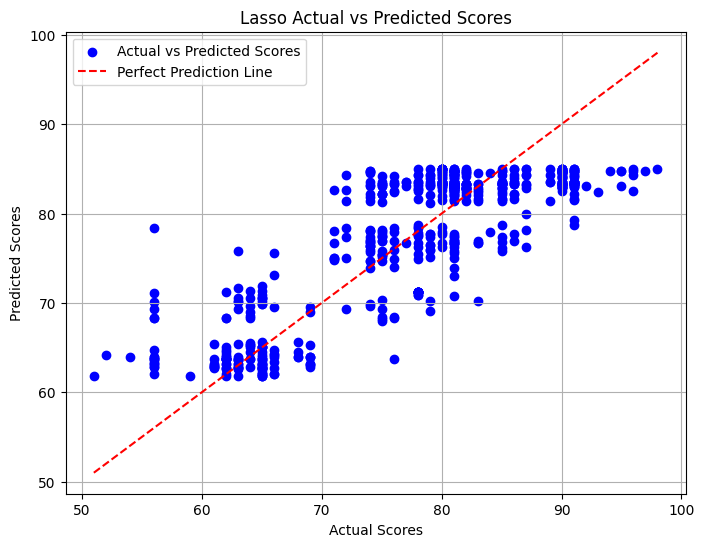

In [72]:
# Actual and Predicted Scores
actual_scores = m_la["Actual Score"]
predicted_scores = m_la["Predicted Score"]

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(actual_scores, predicted_scores, color='blue', label='Actual vs Predicted Scores')
plt.plot([min(actual_scores), max(actual_scores)], [min(actual_scores), max(actual_scores)], linestyle='--', color='red', label='Perfect Prediction Line')
plt.title('Lasso Actual vs Predicted Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.legend()
plt.grid(True)
plt.show()


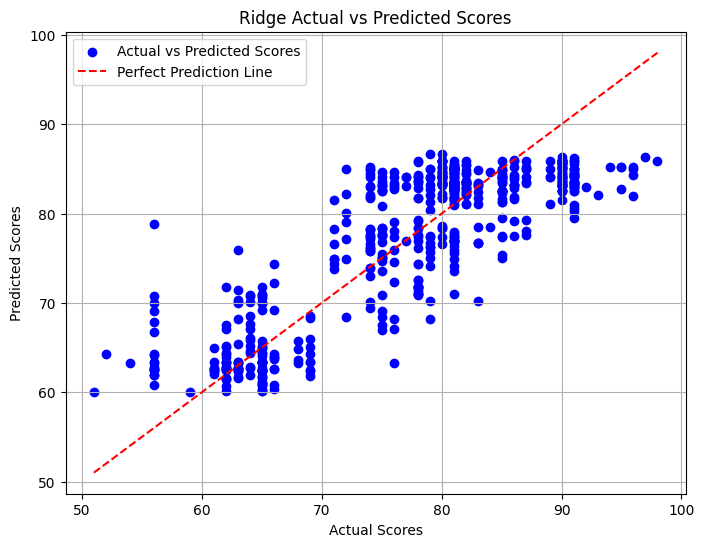

In [73]:
# Actual and Predicted Scores
actual_scores = m_ri["Actual Score"]
predicted_scores = m_ri["Predicted Score"]

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(actual_scores, predicted_scores, color='blue', label='Actual vs Predicted Scores')
plt.plot([min(actual_scores), max(actual_scores)], [min(actual_scores), max(actual_scores)], linestyle='--', color='red', label='Perfect Prediction Line')
plt.title('Ridge Actual vs Predicted Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.legend()
plt.grid(True)
plt.show()


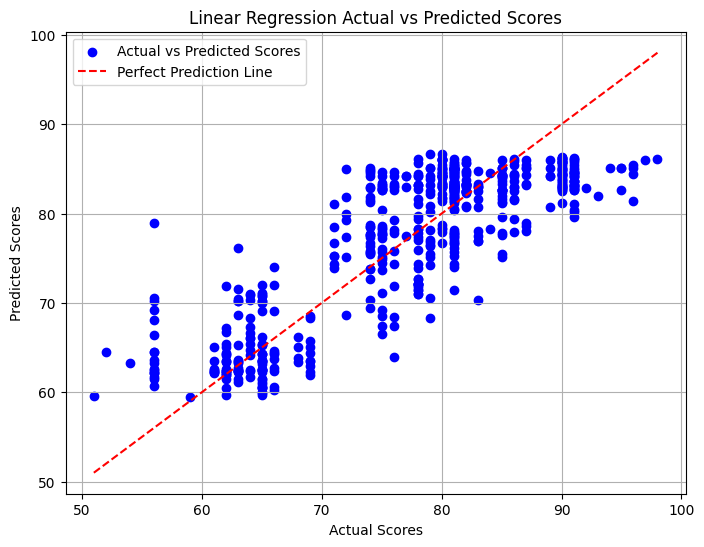

In [74]:
# Actual and Predicted Scores
actual_scores = m_li["Actual Score"]
predicted_scores = m_li["Predicted Score"]

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(actual_scores, predicted_scores, color='blue', label='Actual vs Predicted Scores')
plt.plot([min(actual_scores), max(actual_scores)], [min(actual_scores), max(actual_scores)], linestyle='--', color='red', label='Perfect Prediction Line')
plt.title('Linear Regression Actual vs Predicted Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.legend()
plt.grid(True)
plt.show()


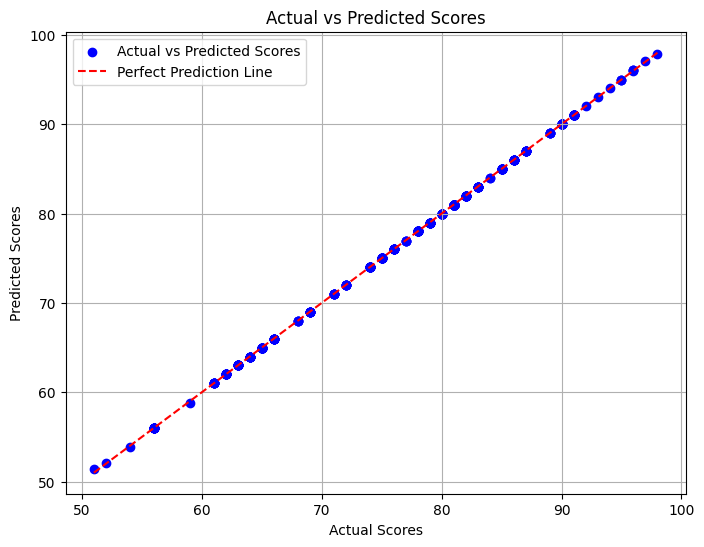

In [75]:
com = pd.read_csv("../save_results/model_predictions_combined_models.csv")

# Actual and Predicted Scores
actual_scores = com["Actual Score"]
predicted_scores = com["Predicted Score"]

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(actual_scores, predicted_scores, color='blue', label='Actual vs Predicted Scores')
plt.plot([min(actual_scores), max(actual_scores)], [min(actual_scores), max(actual_scores)], linestyle='--', color='red', label='Perfect Prediction Line')
plt.title('Actual vs Predicted Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.legend()
plt.grid(True)
plt.show()